In [752]:
import pandas as pd

X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv').drop('Unnamed: 0', axis=1)
player_info = pd.read_csv('player_info.csv', encoding = "ISO-8859-1")
X = X.drop('Unnamed: 0', axis=1)






In [753]:
col_names = list(X.columns.values)
col_names

['height_cm',
 'weight_kg',
 'overall',
 'pac',
 'sho',
 'pas',
 'dri',
 'def',
 'phy',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'marking',
 'standing_tackle']

In [754]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_X = sc_X.fit(X)
X = sc_X.transform(X)

X = pd.DataFrame(X)
X.columns=col_names

X








,height_cm,weight_kg,overall,pac,sho,pas,dri,def,phy,crossing,...,jumping,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle
0,0.430234,0.542320,3.251478,1.872758,2.442644,1.895393,2.174694,-1.058254,1.302773,1.564030,...,2.453701,1.980042,0.205570,-0.929357,1.974313,1.843027,2.009857,2.422585,-1.040669,-0.837477
1,-1.849425,-0.587818,3.110086,1.782118,2.235136,2.274569,2.754563,-1.432391,-0.597031,1.161793,...,0.150928,1.786053,-0.627455,-1.238948,1.879687,2.167246,1.590065,2.496983,-1.420813,-0.963545
2,-1.089539,-1.152887,2.968694,2.054039,1.820121,1.611011,2.657918,-1.218598,-0.697020,1.061234,...,-0.446088,1.252585,-0.183175,-0.619766,1.737747,1.518807,1.769976,2.199391,-1.082907,-1.131637
3,-0.025698,1.389923,2.968694,1.147634,2.235136,1.611011,1.884759,-0.577220,1.402763,1.161793,...,0.236216,1.689059,1.038596,-0.398629,1.832374,1.778183,2.009857,1.529809,-0.702764,-0.249157
4,1.646052,2.237526,2.968694,1.963399,2.235136,3.127715,2.078049,0.384849,2.402660,-1.955537,...,1.003807,-1.705742,-1.682621,-0.885130,-1.952672,0.870368,-0.269015,0.562636,-1.547527,-1.719956
5,0.430234,0.401052,2.827302,1.056993,2.096797,1.231835,1.788114,-0.791013,1.502753,0.407600,...,1.515534,1.543567,1.149666,-0.487084,1.785060,1.389119,1.949887,1.827401,-0.913954,-0.375226
6,1.646052,-0.022749,2.685910,1.872758,1.889290,2.369363,2.174694,0.277952,1.902711,-1.854978,...,0.065640,-1.899730,-1.182806,-0.885130,-1.952672,0.740680,-0.688807,0.116248,-1.420813,-1.257705
7,-1.393493,-0.022749,2.685910,1.872758,1.681782,2.084981,2.367984,-1.111702,-0.097082,1.312632,...,-0.616663,1.495070,-0.294245,-0.398629,1.501182,1.907871,2.069827,1.827401,-0.913954,-1.005568
8,-0.025698,0.259785,2.685910,-1.209020,1.612613,2.558951,1.304890,1.079676,0.302876,1.564030,...,-2.919437,1.883047,0.038965,1.547372,1.217304,2.037558,1.290213,1.678605,0.691096,1.305687
9,0.278257,1.531190,2.685910,0.875712,2.027628,0.757865,1.498180,-1.485840,0.702835,0.709278,...,1.089095,1.495070,-0.516385,-1.327403,1.832374,0.870368,1.110302,1.753003,-1.463051,-1.215682


In [755]:


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1, random_state = 0)


In [796]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc = svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('Precision in sample :{}% \n Precision in test: {}%'.format(100*svc.score(X_train,y_train),100*svc.score(X_test,y_test)))

C:\Users\MartinDammrath\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision in sample :93.91001739995029% 
 Precision in test: 94.41964285714286%


In [757]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Mittelfeld       0.85      0.91      0.88        92
       Sturm       0.96      0.96      0.96       156
     Torwart       1.00      1.00      1.00        52
Verteidigung       0.98      0.93      0.96       148

 avg / total       0.95      0.94      0.94       448



In [801]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=4, random_state=0)
k_means = k_means.fit(X)
X_k_means = k_means.predict(X)
X_k_means = pd.DataFrame(X_k_means, columns=['k_means_result'], index=X.index) 
X_k_means

,k_means_result
0,2
1,2
2,2
3,2
4,1
5,2
6,1
7,2
8,2
9,2


In [783]:
# Achtung, faulerweise überschrieb 

y_pred = svc.predict(X)
y_pred = pd.DataFrame(y_pred)
y_pred = pd.DataFrame(y_pred.values, index=y.index,columns=['Prediction'])
y_pred_vs_test = y_pred.join(y, how="left")
y_pred_vs_test = y_pred_vs_test.join(player_info, how='left')
y_pred_vs_test = y_pred_vs_test.where(y_pred_vs_test['Prediction'] != y_pred_vs_test['Position'])
y_pred_vs_test.dropna(inplace=True)
y_pred_vs_test = y_pred_vs_test.drop(['index','Unnamed: 0'], axis=1)
y_pred_vs_test = y_pred_vs_test.join(X['overall'])
y_pred_vs_test.loc[y_pred_vs_test['league'] == 'German Bundesliga']

#missmatch_count = y_pred_vs_test.groupby(['club']).size().reset_index(name='counts')
#missmatch_count


,Prediction,Position,full_name,club,age,league,overall
66,Sturm,Mittelfeld,Franck Ribéry,FC Bayern Munich,34.0,German Bundesliga,2.120342
140,Mittelfeld,Sturm,Emil Forsberg,RB Leipzig,25.0,German Bundesliga,1.696166
253,Sturm,Mittelfeld,Max Kruse,SV Werder Bremen,29.0,German Bundesliga,1.554774
282,Sturm,Mittelfeld,Raffael Caetano de Araújo,Borussia Mönchengladbach,32.0,German Bundesliga,1.554774
300,Mittelfeld,Verteidigung,Joshua Kimmich,FC Bayern Munich,22.0,German Bundesliga,1.413382
304,Mittelfeld,Sturm,Raphaël Guerreiro,Borussia Dortmund,23.0,German Bundesliga,1.413382
738,Verteidigung,Mittelfeld,Julian Baumgartlinger,Bayer 04 Leverkusen,29.0,German Bundesliga,0.989206
798,Mittelfeld,Sturm,Nadiem Amiri,TSG 1899 Hoffenheim,20.0,German Bundesliga,0.847814
928,Mittelfeld,Verteidigung,Jetro Willems,Eintracht Frankfurt,23.0,German Bundesliga,0.847814
1035,Mittelfeld,Verteidigung,Niklas Moisander,SV Werder Bremen,31.0,German Bundesliga,0.706422


In [ ]:
# from sklearn.cluster import KMeans
# k_means = KMeans(n_clusters=4, random_state=0)
# k_means = k_means.fit(X_train)
# means_pos = pd.DataFrame(k_means.predict(X_train)).reindex(index=X_train.index).join(y_train)
# means_pos

In [729]:
#Reduziere Feature-Anzahl auf 8 (statt 36).

#X_train_modif = X_train_modif.join(y_train)
from sklearn.decomposition import PCA
pca = PCA(n_components= 8)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca, index=X.index, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

#VERSCHLECHTERT PERFORMANCE, WARUM?: Scale X_pca
#sc_X = StandardScaler().fit(X_pca)
#X_pca = sc_X.transform(X_pca)

X_pca_train,X_pca_test,y_pca_train,y_pca_test = train_test_split(X_pca,y, test_size=0.1, random_state = 0)

svc_pca = SVC()
svc_pca = svc_pca.fit(X_pca_train,y_pca_train)
y_pred_pca = svc_pca.predict(X_pca_test)
print('Precision in sample :{}% \n Precision in test: {}%'.format(100*svc_pca.score(X_pca_train,y_pca_train),100*svc_pca.score(X_pca_test,y_pca_test)))






C:\Users\MartinDammrath\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision in sample :92.39373601789708% 
 Precision in test: 91.07142857142857%


In [716]:
print(classification_report(y_pca_test, y_pred_pca))

              precision    recall  f1-score   support

  Mittelfeld       0.82      0.77      0.79        92
       Sturm       0.94      0.92      0.93       156
     Torwart       1.00      1.00      1.00        52
Verteidigung       0.91      0.95      0.93       148

 avg / total       0.91      0.91      0.91       448



,0,Unnamed: 0,index,full_name,club,age,league,Position
0,Sturm,0,0,C. Ronaldo dos Santos Aveiro,Real Madrid CF,32,Spanish Primera División,Sturm
1,Sturm,1,1,Lionel Messi,FC Barcelona,30,Spanish Primera División,Sturm
2,Sturm,2,2,Neymar da Silva Santos Jr.,Paris Saint-Germain,25,French Ligue 1,Sturm
3,Sturm,3,3,Luis Suárez,FC Barcelona,30,Spanish Primera División,Sturm
4,Mittelfeld,4,4,Manuel Neuer,FC Bayern Munich,31,German Bundesliga,Torwart
5,Sturm,5,5,Robert Lewandowski,FC Bayern Munich,28,German Bundesliga,Sturm
6,Mittelfeld,6,6,David De Gea Quintana,Manchester United,26,English Premier League,Torwart
7,Sturm,7,7,Eden Hazard,Chelsea,26,English Premier League,Sturm
8,Mittelfeld,8,8,Toni Kroos,Real Madrid CF,27,Spanish Primera División,Mittelfeld
9,Sturm,9,9,Gonzalo Higuaín,Juventus,29,Italian Serie A,Sturm


In [ ]:
# X_pca[:,0].tolist()
# X_pca = pd.DataFrame(X_pca, columns=['PC1','PC2']).reindex(index=X_train_modif.index)
# X_pca = X_pca.join(y, how='right')
# from matplotlib import pyplot as plt
# # plt.clf()
# # plt.plot(X_pca.iloc[:,0],X_pca.iloc[:,1], 'bo ')
# # plt.show()

# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# targets = ['Torwart','Verteidigung','Mittelfeld','Sturm']
# colors = ['r', 'g', 'b','m']
# for target, color in zip(targets,colors):
#     indicesToKeep = X_pca['Position'] == target
#     ax.scatter(X_pca.loc[indicesToKeep, 'PC1']
#                , X_pca.loc[indicesToKeep, 'PC2']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()
# plt.show()

In [6]:
# ind_of_no_match = []
# import numpy as np
# y_test_array = np.array(y_test)

# for i in range(0,len(y_pred)):
#     if not y_pred[i]==y_test_array[i,0]:
#         ind_of_no_match.append(i)
        
# ind_of_no_match
# player_info = pd.read_csv('player_info.csv', encoding = "ISO-8859-1")
# missmatches = []
# for i in ind_of_no_match:
#     missmatches.append([player_info.iloc[i,2],y_test_array[i,0],y_pred[i]])

# missmatches = pd.DataFrame(missmatches, columns=['Player_Name','Real_Pos','Predicted_Pos'])
# missmatches



,Player_Name,Real_Pos,Predicted_Pos
0,Arturo Vidal,Sturm,Mittelfeld
1,Sokratis Papastathopoulos,Sturm,Mittelfeld
2,Ralf Fährmann,Sturm,Mittelfeld
3,Niklas Süle,Mittelfeld,Verteidigung
4,Ömer Toprak,Sturm,Mittelfeld
5,?ukasz Piszczek,Sturm,Mittelfeld
6,Karim Bellarabi,Sturm,Mittelfeld
7,Oliver Baumann,Mittelfeld,Verteidigung
8,Lars Bender,Sturm,Mittelfeld
9,Julian Weigl,Sturm,Mittelfeld


In [32]:
# X_missmatched = []
# for i in ind_of_no_match:
#     X_missmatched.append(X.iloc[i,:])
# X_missmatched = pd.DataFrame(X_missmatched)
# X_missmatched

,Unnamed: 0,height_cm,weight_kg,overall,potential,pac,sho,pas,dri,def,...,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle
7,0.013329,0.342755,0.142815,0.165665,0.165665,0.142815,0.154240,0.152336,0.150431,0.158048,...,0.146623,0.161857,0.177090,0.161857,0.152336,0.152336,0.154240,0.163761,0.144719,0.169473
13,0.027859,0.398601,0.182157,0.184300,0.184300,0.167155,0.111437,0.117866,0.128581,0.186443,...,0.184300,0.102865,0.195015,0.171441,0.107151,0.111437,0.070720,0.175728,0.188586,0.192872
18,0.049231,0.536072,0.259831,0.229745,0.232480,0.227010,0.235215,0.142223,0.237950,0.117608,...,0.216070,0.024616,0.098462,0.062906,0.030086,0.114872,0.057436,0.166839,0.032821,0.032821
20,0.045947,0.447979,0.222841,0.190678,0.204462,0.149326,0.094190,0.117164,0.112569,0.190678,...,0.215949,0.142434,0.186084,0.188381,0.059731,0.068920,0.073514,0.165408,0.186084,0.197570
24,0.052532,0.407121,0.181672,0.181672,0.183861,0.166351,0.085364,0.135707,0.146651,0.186050,...,0.170728,0.078798,0.159784,0.183861,0.076609,0.129141,0.105064,0.170728,0.188239,0.186050
26,0.052326,0.370304,0.158989,0.167039,0.167039,0.158989,0.138864,0.152952,0.148927,0.163014,...,0.158989,0.136851,0.167039,0.163014,0.146914,0.144901,0.130814,0.165027,0.158989,0.169052
30,0.062305,0.380061,0.166147,0.170300,0.170300,0.191069,0.159916,0.153686,0.176531,0.068536,...,0.141225,0.161993,0.122533,0.078920,0.161993,0.159916,0.118380,0.159916,0.058151,0.062305
32,0.089612,0.523670,0.229631,0.229631,0.235231,0.229631,0.229631,0.179224,0.235231,0.137218,...,0.193226,0.036405,0.089612,0.058808,0.028004,0.114815,0.061608,0.145619,0.028004,0.050407
35,0.072513,0.383285,0.167817,0.169888,0.171960,0.140883,0.132596,0.151242,0.149170,0.169888,...,0.157458,0.147099,0.161601,0.180248,0.142955,0.157458,0.107734,0.171960,0.157458,0.176104
41,0.087761,0.398135,0.154117,0.173381,0.186224,0.149836,0.107025,0.162679,0.162679,0.162679,...,0.134852,0.111306,0.136993,0.184084,0.119868,0.169100,0.107025,0.171241,0.143414,0.175522


In [92]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=3)
# pca_components = pca.fit_transform(X_train)
# principalDf = pd.DataFrame(data = pca_components, columns = ['principal component 1', 'principal component 2','principal component 3'])

# finalDf = pd.concat([principalDf, y], axis = 1)

# finalDf

,principal component 1,principal component 2,principal component 3,Position
0,0.327388,-0.018486,0.069157,Torwart
1,-0.090847,0.023957,0.130054,Sturm
2,0.214173,0.288637,-0.121626,Mittelfeld
3,-0.236105,-0.050905,0.076505,Sturm
4,-0.288079,-0.020392,-0.107415,Verteidigung
5,-0.400554,-0.069911,-0.124801,Verteidigung
6,0.164383,-0.086384,0.034044,Mittelfeld
7,0.375067,-0.093555,-0.069838,Mittelfeld
8,-0.263016,0.095187,0.174417,Mittelfeld
9,0.442346,0.148757,-0.052561,Verteidigung


C:\Users\MartinDammrath\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


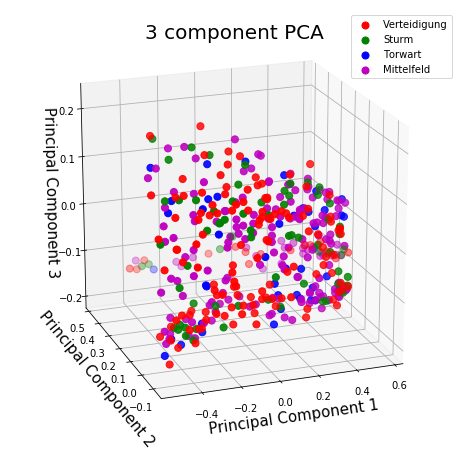

In [165]:
# from matplotlib import pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(111, projection='3d')
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_zlabel('Principal Component 3', fontsize = 15)
# ax.set_title('3 component PCA', fontsize = 20)
# targets = ['Verteidigung','Sturm','Torwart','Mittelfeld']
# colors = ['r', 'g', 'b', 'm']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['Position'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#                , finalDf.loc[indicesToKeep, 'principal component 2']
#                , finalDf.loc[indicesToKeep, 'principal component 3']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()



# ax.view_init(azim=250, elev=20)
# fig

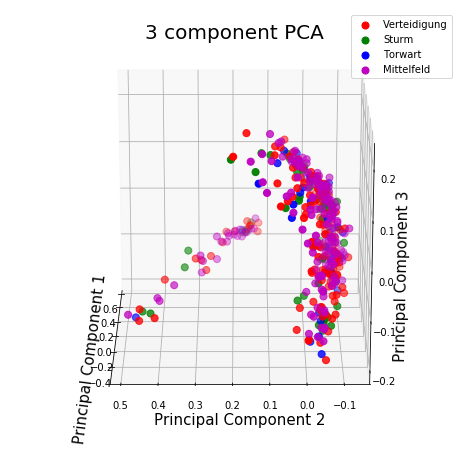

In [167]:
# ax.view_init(azim=180, elev=20)
# fig